## Sliding time window
La ventana de tiempo deslizante a implementar consta de ...

### Imports

In [55]:
import numpy as np
import pandas as pd
from scipy import stats as st
import plotly.graph_objects as go
from tqdm import tqdm
import glob
from sklearn.model_selection import train_test_split

### Load data

In [56]:
device = 'smartphone' 
#event = 'cambio de línea agresivo izquierda'
event = 'cambio de línea agresivo izquierda'
files_to_read = glob.glob('./filtered_data/{}*{}*.csv'.format(device, event))

#df_train = pd.read_csv('./filtered_data/smartphone_02-Feb-2022-20-22_cambio de línea agresivo izquierda_Data-Mv2MN6xv2W3Rv1Rmb_Z.csv')
#df_test = pd.read_csv('./filtered_data/smartphone_02-Feb-2022-20-19_cambio de línea agresivo izquierda_Data-Mv2L_EBJR_gDU3LpwVs.csv')

df = pd.DataFrame()
for file in files_to_read:
    df = pd.concat([df, pd.read_csv(file)])

df = df.set_index('id')
print("All data size: ", df.shape)
df_train, df_test = train_test_split(df.sort_index(), test_size=0.3, train_size=0.7, random_state=0, shuffle=False)

print("Train data size: ", df_train.shape)
print("Near crash event data size: ", df_train["eventClass"][df_train["eventClass"] == 1].shape)
print("No near crash event data size: ", df_train["eventClass"][df_train["eventClass"] == 0].shape)

print("\nTest data size: ", df_test.shape)
print("Near crash event data size: ", df_test["eventClass"][df_test["eventClass"] == 1].shape)
print("No near crash event data size: ", df_test["eventClass"][df_test["eventClass"] == 0].shape)

df_train

All data size:  (3733, 17)
Train data size:  (2613, 17)
Near crash event data size:  (464,)
No near crash event data size:  (2149,)

Test data size:  (1120, 17)
Near crash event data size:  (136,)
No near crash event data size:  (984,)


,accX,accY,accZ,eventClass,idTrip,idVehicle,latitude,longitude,magX,magY,magZ,route,speed,timestamp,velAngX,velAngY,velAngZ
id,,,,,,,,,,,,,,,,,
13533,-0.138011,1.331316,9.639226,0,19,Nissan March (Xiaomi Redmi Note 9S),0.833793,-77.650009,4.664763,-42.733253,59.949496,Cambio de línea agresivo izquierda,7.339460,2022-01-23 19:15:33.613000-05:00,-0.010732,-0.024220,0.000681
13534,-0.050553,1.182238,9.640528,0,19,Nissan March (Xiaomi Redmi Note 9S),0.833793,-77.650009,4.684517,-42.746425,60.048403,Cambio de línea agresivo izquierda,7.339460,2022-01-23 19:15:33.663000-05:00,-0.010511,-0.023075,0.000194
13535,-0.071837,1.190314,9.561614,0,19,Nissan March (Xiaomi Redmi Note 9S),0.833793,-77.650009,4.934497,-42.749323,59.963401,Cambio de línea agresivo izquierda,7.339460,2022-01-23 19:15:33.713000-05:00,-0.009359,-0.021741,0.002318
13536,-0.100731,1.169613,9.484931,0,19,Nissan March (Xiaomi Redmi Note 9S),0.833793,-77.650009,4.948134,-42.673797,60.008407,Cambio de línea agresivo izquierda,7.339460,2022-01-23 19:15:33.763000-05:00,-0.006022,-0.019840,0.002179
13537,0.118383,1.254682,9.645636,0,19,Nissan March (Xiaomi Redmi Note 9S),0.833793,-77.650009,5.098216,-42.629128,59.910096,Cambio de línea agresivo izquierda,7.339460,2022-01-23 19:15:33.814000-05:00,0.001969,-0.009525,0.000068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37962,-1.427612,1.336614,9.417382,0,18,Nissan March (Xiaomi Redmi Note 9S),0.833797,-77.650022,19.808157,-35.636911,58.154053,Cambio de línea agresivo izquierda,28.792559,2022-02-02 20:22:07.699000-05:00,-0.065179,-0.012674,0.115127
37963,-1.088481,1.261627,9.235299,0,18,Nissan March (Xiaomi Redmi Note 9S),0.833797,-77.650022,19.801159,-35.642404,58.192374,Cambio de línea agresivo izquierda,28.792559,2022-02-02 20:22:07.748000-05:00,-0.033713,-0.020394,0.099633
37964,-0.138346,1.800179,8.966337,0,18,Nissan March (Xiaomi Redmi Note 9S),0.833727,-77.650043,20.025403,-35.929472,58.183098,Cambio de línea agresivo izquierda,26.656229,2022-02-02 20:22:07.800000-05:00,0.013796,-0.025721,0.086128


### Select the interest variables

In [57]:
# Transform pandas.Series to numpy.Array

#variables = df[["speed","accX","accY","magX","magY","magZ",
#                "velAngX","velAngY","velAngZ","timestamp",
#                "eventClass"]].to_numpy()

# Always put "eventClass" at the end:
select_v = ["accX", "accY", "velAngZ"]
select_v = [*select_v,  "eventClass"]
variables_train = df_train[select_v].to_numpy()
print("Variables Train shape", variables_train.shape)

variables_test = df_test[select_v].to_numpy()
print("Variables Test shape", variables_test.shape)

Variables Train shape (2613, 4)
Variables Test shape (1120, 4)


### Make a sliding window

The sliding window have this shape:

$ rows = m - ws + 1 \\  columns = ws \\ pages = d$

![](https://es.mathworks.com/help/matlab/math/nddemo_02_es.gif)

Where:
- ***m***:  Is the data size,
- ***ws***: Is the window size
- ***d***:  Is the dimensions of the data (measured variables)


#### Naive alternative

In [62]:
# Select axis 0 to slide over all rows of the data
def sliding_windows(variables, window_size):
      
      #     In 2-dimensional dataset:
      # Axis 0 -> Goes through the rows
      # Axis 1 -> Goes through the Cols
      sld_window = np.lib.stride_tricks.sliding_window_view(variables, window_size, axis=0) #[::1, :] Add this for define window step

      # Sample of sliding window 
      print("\nsliding window shape: ",sld_window.shape)
      #print("\nSample of sliding window")
      #print(sld_window[0,:,:])

      # Processing the sliding window
      event_page_index = variables.shape[1] - 1
      measured_variables = sld_window[:, 0:event_page_index, :]
      event_variables = sld_window[:, event_page_index, :]

      # Mean, median, std, max and min value for measured variables
      mean = measured_variables.mean(axis=2)
      median = np.median(measured_variables, axis=2)
      std = measured_variables.std(axis=2)
      max_val = measured_variables.max(axis=2)
      min_val = measured_variables.min(axis=2)

      # Tendency for measured variables
      divider = np.array([mean[0],*mean[:-1]])
      tendency = mean/np.where(divider == 0, 1, divider)
      tendency = np.nan_to_num(tendency, nan=0, posinf=60, neginf=0)

      # Event class for measured variables
      event_mode = st.mode(event_variables, axis=1)[0]

      print("Processing slide window shape: " +
            "mean={}, median={}, std={}, max_val={}, min_val={}, tendency={}, event_mode={}"
            .format(mean.shape, median.shape, std.shape, max_val.shape, min_val.shape, tendency.shape, event_mode.shape))
      #print("Sample of sliding window process")
      #print("Mean:\n {} \nMedian:\n {} \nStandard deviation:\n {} \nMax_val:\n {} \nMin_val\n {} \ntendency:\n {} \nEvent class Mode:\n {}"
      #     .format(mean[0:2,:], median[0:2,:], std[0:2,:], max_val[0:2,:], min_val[0:2,:], tendency[0:2], event_mode[0:2]))
      

      # Concatenate processing data
      input_features = np.concatenate((mean, median, std, max_val, min_val, tendency), axis=1)
      labels = event_mode.reshape(event_mode.shape[0])
      #print(input_features)
      #print(labels)

      return (input_features, labels)


In [63]:
window_size = 20
X_train, y_train = sliding_windows(variables_train, window_size)
X_test, y_test = sliding_windows(variables_test, window_size)


sliding window shape:  (2594, 4, 20)
Processing slide window shape: mean=(2594, 3), median=(2594, 3), std=(2594, 3), max_val=(2594, 3), min_val=(2594, 3), tendency=(2594, 3), event_mode=(2594, 1)

sliding window shape:  (1101, 4, 20)
Processing slide window shape: mean=(1101, 3), median=(1101, 3), std=(1101, 3), max_val=(1101, 3), min_val=(1101, 3), tendency=(1101, 3), event_mode=(1101, 1)


#### Input features

In [66]:
print("Train features shape:", X_train.shape)
#print(X_train[0:5])
print("Near crash event train data size: ", np.where(y_train == 1)[0].shape)
print("No near crash event train data size: ", np.where(y_train == 0)[0].shape)

print("\n")
print("Test features shape:", X_test.shape)
#print(X_test[0:5])
print("Near crash event test data size: ", np.where(y_test == 1)[0].shape)
print("No near crash event test data size: ", np.where(y_test == 0)[0].shape)

Train features shape: (2594, 18)
Near crash event train data size:  (461,)
No near crash event train data size:  (2133,)


Test features shape: (1101, 18)
Near crash event test data size:  (133,)
No near crash event test data size:  (968,)


## Machine Learning 

Make a Machine Learning algorithms

In [67]:
from sklearn import svm
from sklearn.model_selection import train_test_split

clf = svm.SVC(C=1, gamma='scale', kernel='rbf', random_state=0)
clf.fit(X_train, y_train)

SVC(C=1, random_state=0)

#### Test ML algorithm

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
y_predict = clf.predict(X_test)
y_score = clf.decision_function(X_test)
#y_predict_proba = clf.predict_proba(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predict)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predict)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predict)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predict)))
#print("Accuracy: ", clf.score(X_test, y_test))

print("Count total data predicted: ",Counter(y_predict))

Accuracy: 0.95
Precision: 0.98
Recall: 0.62
F1: 0.76
Count total data predicted:  Counter({0.0: 1017, 1.0: 84})


#### Confusion matrix

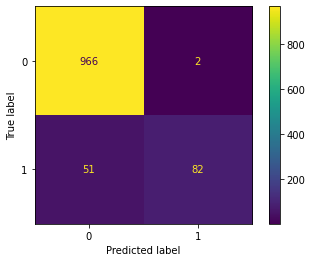

In [69]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cf_matrix = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(cf_matrix)
disp.plot()
plt.show()

#### Roc curves and Area Under Curve (AUC)

gamma = 0.01  accuracy = 0.96   AUC = 0.97
gamma = 0.10  accuracy = 0.96   AUC = 0.98
gamma = 0.20  accuracy = 0.95   AUC = 0.98
gamma = 1.00  accuracy = 0.90   AUC = 0.93


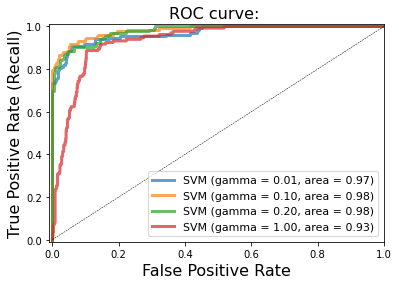

In [70]:
from sklearn.metrics import roc_curve, auc

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    clf = svm.SVC(C=1, gamma=g, kernel='rbf', random_state=0).fit(X_train, y_train)
    y_score = clf.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    accuracy = clf.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy, 
                                                                    roc_auc))
    plt.plot(fpr, tpr, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: ', fontsize=16)
#plt.axes().set_aspect('equal')

plt.show()

In [ ]:
# Tendency
'''
def trend(arr):
    """This function calculates the trend with the unique loopback option for this type of calculation

    This tendency is not make for frame form, for this reason the equation is this: register(i)/last_register
    where "i" is the position of a register

    Note: I calculate the first tendency how last_register/last_register = 1, 
    this data appear in all first values of all rows in the slide window
    """
    t = [arr[-i]/arr[-1] for i in range(1, len(arr)+1)]
    #mean[::-1]/mean[-1]
    #for i in range(1,len(array)+1):
    #    t.append(array[-i]/array[-1])
    return np.array(t)

variables_trend = np.apply_along_axis(trend, axis=2, arr=measured_variables)
variables_trend = variables_trend.reshape(variables_trend.shape[0], variables_trend.shape[1]*ws)   # Son 20 para la speed y 20 para la accY
print("\nSample of sliding window process for tendency")
print("Tendency slide window shape: ", variables_trend.shape)
print("Tendency:\n {}".format(variables_trend[0:2,:]))
'''

'\ndef trend(arr):\n    """This function calculates the trend with the unique loopback option for this type of calculation\n\n    This tendency is not make for frame form, for this reason the equation is this: register(i)/last_register\n    where "i" is the position of a register\n\n    Note: I calculate the first tendency how last_register/last_register = 1, \n    this data appear in all first values of all rows in the slide window\n    """\n    t = [arr[-i]/arr[-1] for i in range(1, len(arr)+1)]\n    #mean[::-1]/mean[-1]\n    #for i in range(1,len(array)+1):\n    #    t.append(array[-i]/array[-1])\n    return np.array(t)\n\nvariables_trend = np.apply_along_axis(trend, axis=2, arr=measured_variables)\nvariables_trend = variables_trend.reshape(variables_trend.shape[0], variables_trend.shape[1]*ws)   # Son 20 para la speed y 20 para la accY\nprint("\nSample of sliding window process for tendency")\nprint("Tendency slide window shape: ", variables_trend.shape)\nprint("Tendency:\n {}".for

In [ ]:
# tendency
'''
def means_loopback(array):
    """This functions calculate the means with loop back option
    """
    means = []
    for i in range(1,len(array)+1):
        means.append(array[-i:].mean())
    return np.array(means)

print("data to get loop back mean: \n", measured_variables[0:2,:,:])
# mean loopback test
mean_lb = np.apply_along_axis(means_loopback, 2, measured_variables[0:2,:,:])
print("Mean loopback: \n",mean_lb)
'''

'\ndef means_loopback(array):\n    """This functions calculate the means with loop back option\n    """\n    means = []\n    for i in range(1,len(array)+1):\n        means.append(array[-i:].mean())\n    return np.array(means)\n\nprint("data to get loop back mean: \n", measured_variables[0:2,:,:])\n# mean loopback test\nmean_lb = np.apply_along_axis(means_loopback, 2, measured_variables[0:2,:,:])\nprint("Mean loopback: \n",mean_lb)\n'